   Unnamed: 0  Total_bill   Tip     Sex Smoker  Day    Time  Size
0           0       16.99  1.01  Female     NO  Sun  Dinner     2
1           1       10.34  1.66    Male     NO  Sun  Dinner     3
2           2       21.10  3.50    Male     NO  Sun  Dinner     3
3           3       23.68  3.31    Male     NO  Sun  Dinner     2
4           4       24.59  3.61  Female     NO  Sun  Dinner     4


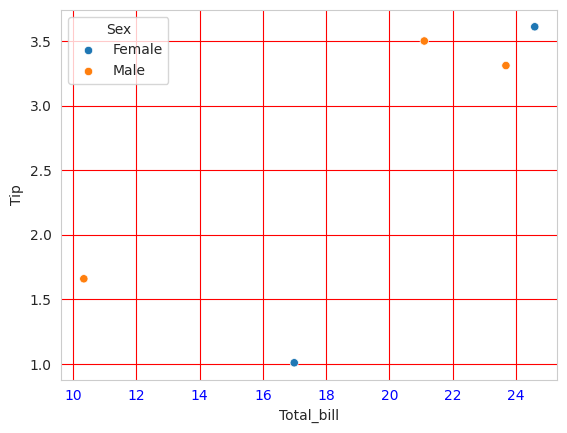

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from the Excel file
df = pd.read_excel("pyexp7.xlsx")  # Load the Excel file from the same folder

# Display the first few rows of the dataset
print(df.head())

# Set Seaborn style
sns.set_style("whitegrid", rc={"lines.linewidth": 2.5, "grid.color": "red", "xtick.color": "blue"})

# Create a scatter plot
sns.scatterplot(x="Total_bill", y="Tip", hue="Sex", data=df)
# Save the plot as an image file


# Display the plot
plt.show()
